In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv("C:/Users/User/Desktop/BlackFriday(1).csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [128]:
print(df.info())
print('Shape: ',df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 39.0+ MB
None
Shape:  (537577, 12)


In [129]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [130]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875


In [131]:
total_miss = df.isnull().sum()
perc_miss = total_miss/df.isnull().count()*100

missing_data = pd.DataFrame({'Total missing':total_miss,
                            '% missing':perc_miss})

missing_data.sort_values(by='Total missing',
                         ascending=False).head(3)

,% missing,Total missing
Product_Category_3,69.441029,373299
Product_Category_2,31.062713,166986
User_ID,0.000000,0


In [132]:
half_count_train = len(df) / 2

df = df.dropna(thresh=half_count_train,axis=1) 

In [133]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,7969


In [134]:
avg_train = df.Product_Category_2.mean()
df['Product_Category_2'].fillna(avg_train, inplace=True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842144,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842144,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842144,7969


In [135]:
unique_users = len(df.User_ID.unique())
unique_products = len(df.Product_ID.unique())
print('There are {} unique users and {} unique products in the set'.format(unique_users, unique_products))

There are 5891 unique users and 3623 unique products in the set


In [136]:
df=df.drop(["User_ID"], axis=1)
df=df.drop(["Product_ID"], axis=1)

In [137]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,9.842144,8370
1,F,0-17,10,A,2,0,1,6.000000,15200
2,F,0-17,10,A,2,0,12,9.842144,1422
3,F,0-17,10,A,2,0,12,14.000000,1057
4,M,55+,16,C,4+,0,8,9.842144,7969


In [138]:
for col_name in ['Gender', 'Age', 'Occupation', 'City_Category']:
    print(sorted(df[col_name].unique()))

['F', 'M']
['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
['A', 'B', 'C']


In [139]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [140]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [141]:
df['Stay_In_Current_City_Years'] = [x.strip().replace('4+', '4') for x in df['Stay_In_Current_City_Years']]
# Then we need to replace the object type values by integers                                                                                       
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(str).astype(int)
print(df['Stay_In_Current_City_Years'])


0         2
1         2
2         2
3         2
4         4
5         3
6         2
7         2
8         2
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        4
20        4
21        4
22        4
23        4
24        4
25        0
26        0
27        0
28        0
29        4
         ..
537547    1
537548    1
537549    1
537550    3
537551    3
537552    3
537553    3
537554    3
537555    3
537556    1
537557    1
537558    1
537559    1
537560    1
537561    1
537562    1
537563    1
537564    1
537565    1
537566    1
537567    1
537568    1
537569    1
537570    1
537571    1
537572    1
537573    1
537574    1
537575    1
537576    1
Name: Stay_In_Current_City_Years, Length: 537577, dtype: int32


In [142]:
df = df.drop(["Product_Category_1"],axis=1)
df = df.drop(["Product_Category_2"],axis=1)

In [143]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,F,0-17,10,A,2,0,8370
1,F,0-17,10,A,2,0,15200
2,F,0-17,10,A,2,0,1422
3,F,0-17,10,A,2,0,1057
4,M,55+,16,C,4,0,7969


In [144]:
for col_name in df.columns:
    print(col_name, len(df[col_name].unique()))

Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Purchase 17959


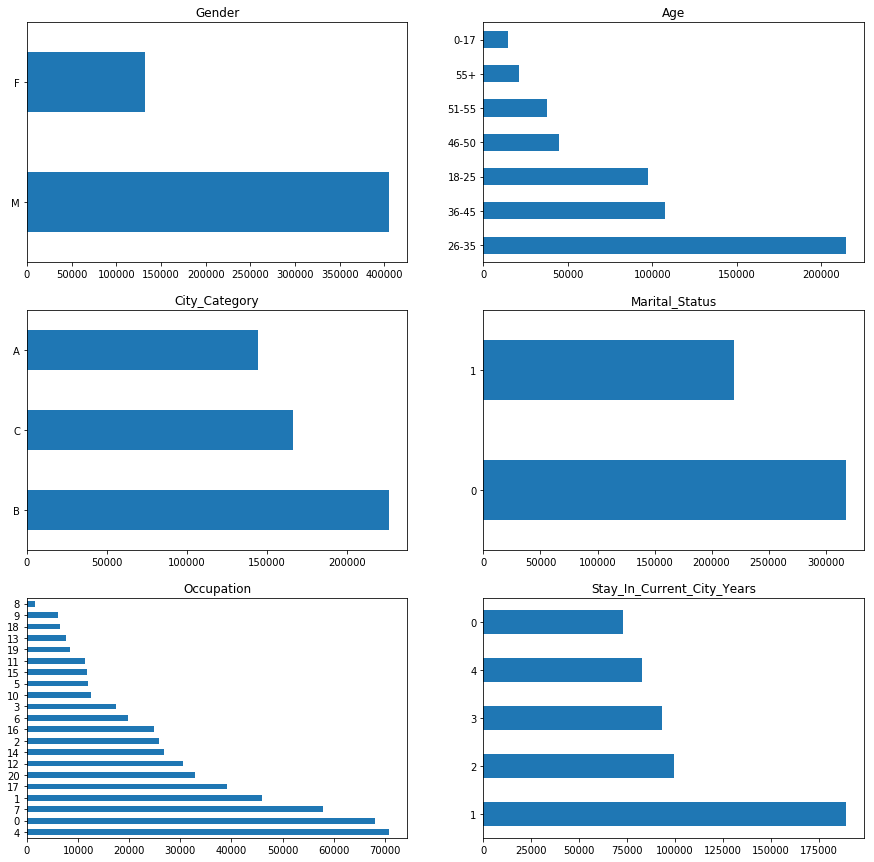

In [145]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=[15, 15])

df['Gender'].value_counts().plot(kind='barh', ax=axes[0,0], title='Gender')
df['Age'].value_counts().plot(kind='barh', ax=axes[0,1], title='Age')
df['City_Category'].value_counts().plot(kind='barh', ax=axes[1,0], title='City_Category')
df['Marital_Status'].value_counts().plot(kind='barh', ax=axes[1,1], title='Marital_Status')
df['Occupation'].value_counts().plot(kind='barh', ax=axes[2,0], title='Occupation')
df['Stay_In_Current_City_Years'].value_counts().plot(kind='barh', ax=axes[2,1], title='Stay_In_Current_City_Years')

In [159]:
df.Gender = np.where(str(df.Gender)=='M',1,0) 
train_Age = pd.get_dummies(df.Age)
train_CC = pd.get_dummies(df.City_Category)
train_Occup = pd.get_dummies(df.Occupation)
X = pd.concat([train_Age,train_CC,train_Occup,df],axis=1)
X.drop(['Age','City_Category','Occupation',"Purchase"],axis=1,inplace=True)
X.head()
X.shape

(537577, 34)

In [154]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,0,0-17,10,A,2,0,8370
1,0,0-17,10,A,2,0,15200
2,0,0-17,10,A,2,0,1422
3,0,0-17,10,A,2,0,1057
4,0,55+,16,C,4,0,7969


In [180]:
features = ['Purchase']
y = df[features]

y.reshape((537577,1))

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [181]:
y.shape

(537577, 1)

In [182]:
"""import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(20, 12))
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)
plt.show()"""

'import matplotlib.pyplot as plt\nimport seaborn as sns\nf, ax = plt.subplots(figsize=(20, 12))\ncorr = df.corr()\nsns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)\nplt.show()'

In [183]:
#X_train = train_encoded.iloc[:, :-1].values # Prend toutes les colonnes sauf la dernière (variable cible)
#y_train = train_encoded.iloc[:,-1].values # Prend la dernière colonne (variable cible)


In [184]:
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test = train_test_split(train_encoded,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)
clf = LinearRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test


y_train_pred = lr.predict(x_train)
rmse=(np.sqrt(mean_squared_error(y_train,y_train_pred)))
r2=r2_score(y_train,y_train_pred)

print("Model performance for training set: \n")
print("RMSE is {}".format(rmse))
print("R2 score is{}".format(r2),'\n')

ValueError: Found input variables with inconsistent numbers of samples: [537577, 403182]